<a href="https://colab.research.google.com/github/tekgulburak/Stock-Trading-Gym-Apple-Data-/blob/main/Stock_Trading_Gym_Apple_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow-gpu

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
!pip install tensorflow

In [3]:
!pip install stable-baselines3 gym

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.7/181.7 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 15.4 MB/s eta 0:00:00


In [4]:
!pip install gym-anytrading

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.2/172.2 kB 2.9 MB/s eta 0:00:00


In [5]:
#upload gym requirements
import gymnasium as gym
import gym_anytrading
from gym_anytrading.envs import TradingEnv, ForexEnv, StocksEnv, Actions, Positions

#upload stable baselines for reinforcement learning

from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [7]:
df=pd.read_csv("/content/aapl_raw_data.csv")

In [8]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,date,open,high,low,close,volume,adjusted_close,change_percent,avg_vol_20d
0,1980-12-12,28.7392,28.8736,28.7392,28.7392,2093900,0.0993,NaN,NaN
1,1980-12-15,27.3728,27.3728,27.2608,27.2608,785200,0.0942,-5.14,NaN
2,1980-12-16,25.3792,25.3792,25.2448,25.2448,472000,0.0872,-7.43,NaN
3,1980-12-17,25.8720,26.0064,25.8720,25.8720,385900,0.0894,2.52,NaN
4,1980-12-18,26.6336,26.7456,26.6336,26.6336,327900,0.0920,2.91,NaN


In [9]:
df["date"]=pd.to_datetime(df["date"])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,date,open,high,low,close,volume,adjusted_close,change_percent,avg_vol_20d
0,1980-12-12,28.7392,28.8736,28.7392,28.7392,2093900,0.0993,NaN,NaN
1,1980-12-15,27.3728,27.3728,27.2608,27.2608,785200,0.0942,-5.14,NaN
2,1980-12-16,25.3792,25.3792,25.2448,25.2448,472000,0.0872,-7.43,NaN
3,1980-12-17,25.8720,26.0064,25.8720,25.8720,385900,0.0894,2.52,NaN
4,1980-12-18,26.6336,26.7456,26.6336,26.6336,327900,0.0920,2.91,NaN


In [11]:
df.dtypes #check type of date

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


date              datetime64[ns]
open                     float64
high                     float64
low                      float64
close                    float64
volume                     int64
adjusted_close           float64
change_percent           float64
avg_vol_20d              float64
dtype: object

In [12]:
df.set_index("date",inplace=True)
df.head()

,open,high,low,close,volume,adjusted_close,change_percent,avg_vol_20d
date,,,,,,,,
1980-12-12,28.7392,28.8736,28.7392,28.7392,2093900,0.0993,NaN,NaN
1980-12-15,27.3728,27.3728,27.2608,27.2608,785200,0.0942,-5.14,NaN
1980-12-16,25.3792,25.3792,25.2448,25.2448,472000,0.0872,-7.43,NaN
1980-12-17,25.8720,26.0064,25.8720,25.8720,385900,0.0894,2.52,NaN
1980-12-18,26.6336,26.7456,26.6336,26.6336,327900,0.0920,2.91,NaN


In [13]:
df.sort_values("date",ascending=True,inplace=True)
df=df.iloc[:,:-3]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
df.head()

,open,high,low,close,volume
date,,,,,
1980-12-12,28.7392,28.8736,28.7392,28.7392,2093900
1980-12-15,27.3728,27.3728,27.2608,27.2608,785200
1980-12-16,25.3792,25.3792,25.2448,25.2448,472000
1980-12-17,25.8720,26.0064,25.8720,25.8720,385900
1980-12-18,26.6336,26.7456,26.6336,26.6336,327900


In [15]:
df.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')

In [16]:
df.rename(columns={df.columns[3]:"Close"},inplace=True)
env = gym.make("stocks-v0", df=df, frame_bound=(10, len(df)-1), window_size=10)


In [17]:
env.signal_features

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.signal_features to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.signal_features` for environment variables or `env.get_wrapper_attr('signal_features')` that will search the reminding wrappers.
  logger.warn(


array([[ 2.87392e+01,  0.00000e+00],
       [ 2.72608e+01, -1.47840e+00],
       [ 2.52448e+01, -2.01600e+00],
       ...,
       [ 1.94710e+02,  1.53000e+00],
       [ 1.97960e+02,  3.25000e+00],
       [ 1.98110e+02,  1.50000e-01]], dtype=float32)

In [18]:
env.signal_features.shape

(10843, 2)

In [19]:
env.action_space

Discrete(2)

In [20]:
df.shape

(10844, 5)

# Yeni Bölüm

info: {'total_reward': 440.12275791168213, 'total_profit': 6.5545879532705865e-18, 'position': <Positions.Long: 1>}


/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.render_all to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.render_all` for environment variables or `env.get_wrapper_attr('render_all')` that will search the reminding wrappers.
  logger.warn(


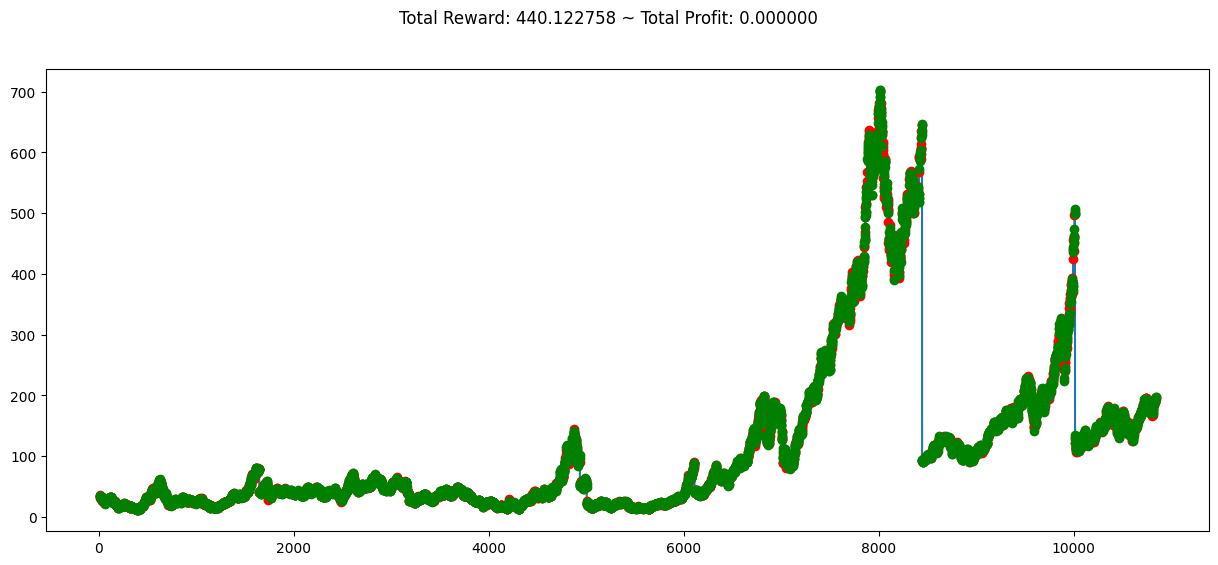

In [21]:
state = env.reset()

while True:
    action = env.action_space.sample()
    new_state, reward,_,done,info = env.step(action)
    if done:
        print("info:", info)
        break

plt.figure(figsize=(15, 6))
plt.cla()
env.render_all()
plt.show()

In [22]:
pip install finta

In [23]:
from finta import TA

In [24]:
df["volume"]=df["volume"].astype(str).apply(lambda x:float(x.replace(",","")))


In [25]:
df.dtypes

open      float64
high      float64
low       float64
Close     float64
volume    float64
dtype: object

In [26]:
df["SMA"]=TA.SMA(df,12)
df["RSI"]=TA.RSI(df)
df["OBV"]=TA.OBV(df)
df.fillna(0,inplace=True)

In [27]:
df.head(15)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,open,high,low,Close,volume,SMA,RSI,OBV
date,,,,,,,,
1980-12-12,28.7392,28.8736,28.7392,28.7392,2093900.0,0.000000,0.000000,0.0
1980-12-15,27.3728,27.3728,27.2608,27.2608,785200.0,0.000000,0.000000,-785200.0
1980-12-16,25.3792,25.3792,25.2448,25.2448,472000.0,0.000000,0.000000,-1257200.0
1980-12-17,25.8720,26.0064,25.8720,25.8720,385900.0,0.000000,16.619224,-871300.0
1980-12-18,26.6336,26.7456,26.6336,26.6336,327900.0,0.000000,31.505104,-543400.0
1980-12-19,28.2464,28.3808,28.2464,28.2464,217100.0,0.000000,51.323424,-326300.0
1980-12-22,29.6352,29.7472,29.6352,29.6352,166800.0,0.000000,61.621209,-159500.0
1980-12-23,30.8672,31.0016,30.8672,30.8672,209600.0,0.000000,68.073708,50100.0
1980-12-24,32.5024,32.6144,32.5024,32.5024,214300.0,0.000000,74.259537,264400.0


In [36]:
def add_signals(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'low'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['low', 'volume','SMA', 'RSI', 'OBV']].to_numpy()[start:end]
    return prices, signal_features

In [45]:
class my_custom_env(StocksEnv):
  _process_data=add_signals

env2=my_custom_env(df=df,window_size=12,frame_bound=(12,50))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
env2.signal_features

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[ 2.87392000e+01,  2.09390000e+06,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 2.72608000e+01,  7.85200000e+05,  0.00000000e+00,
         0.00000000e+00, -7.85200000e+05],
       [ 2.52448000e+01,  4.72000000e+05,  0.00000000e+00,
         0.00000000e+00, -1.25720000e+06],
       [ 2.58720000e+01,  3.85900000e+05,  0.00000000e+00,
         1.66192235e+01, -8.71300000e+05],
       [ 2.66336000e+01,  3.27900000e+05,  0.00000000e+00,
         3.15051035e+01, -5.43400000e+05],
       [ 2.82464000e+01,  2.17100000e+05,  0.00000000e+00,
         5.13234245e+01, -3.26300000e+05],
       [ 2.96352000e+01,  1.66800000e+05,  0.00000000e+00,
         6.16212092e+01, -1.59500000e+05],
       [ 3.08672000e+01,  2.09600000e+05,  0.00000000e+00,
         6.80737083e+01,  5.01000000e+04],
       [ 3.25024000e+01,  2.14300000e+05,  0.00000000e+00,
         7.42595368e+01,  2.64400000e+05],
       [ 3.55040000e+01,  2.48100000e+05,  0.00000000e+00,
         8.13881561e+01

In [47]:
env_maker=lambda:env2
env=DummyVecEnv([env_maker])

In [ ]:
model=A2C("MlpLstmPolicy",env,verbose=1)
model.learn(total_timesteps=1000000)

In [ ]:
env=mycustomenv(df=df,window_size=12,frame_bound=(80,250))
obs=env.reset()
while True:
  obs=obs[np.newaxis,...]
  action,_states=model.predict(obs)
  obs,rewards,done,info=env.step(action)
  if done:
    print("info",info)
    break

In [ ]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()